<a href="https://colab.research.google.com/github/harsh204016/Game-of-Deep-Learning/blob/master/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/ML Competitions/Game of Deep learning"

code.ipynb  data1.csv  model.h5  output128_3.csv  test.csv  train.csv


In [0]:
import os 
os.chdir('/content/drive/My Drive/ML Competitions/Game of Deep learning')

In [0]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from csv import DictReader

Using TensorFlow backend.


In [0]:
#pixels=pd.read_csv("output128_3.csv")
#labels=pd.read_csv('train.csv')


In [0]:
#data1=pd.merge(pixels,labels,on='image')


In [0]:
#data1.to_csv("data1.csv",sep=',',index=False)
a=datetime.datetime.now()
data1=pd.read_csv("data1.csv")
b=datetime.datetime.now()
print(b-a)

0:05:07.036548


In [0]:
data1.shape

(6252, 49154)

In [0]:
Y=data1["category"]
X=data1.drop(labels = ["category","image"],axis = 1)


In [0]:
X=X/5

In [0]:
X=X/51

In [0]:
X=X.values.reshape(-1,128,128,3)

le=LabelEncoder()
Y=le.fit_transform(Y)
Y = to_categorical(Y,5)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size = 0.25, random_state = 2)
x_train.shape

(4689, 128, 128, 3)

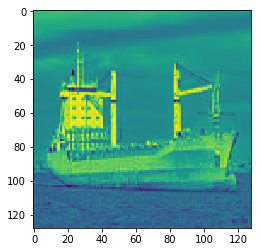

In [0]:

plt.imshow(x_train[0][:,:,0])

In [0]:
base_model=MobileNet(input_shape=(128,128,3),weights='imagenet',include_top=False)
 #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(5,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)


Instructions for updating:
Colocations handled automatically by placer.
17227776/17225924 [==============================] - 0s 0us/step


In [0]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True


0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [0]:
datagen=ImageDataGenerator(rotation_range=30, horizontal_flip=0.4) #included in our dependencies

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
h=model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
                      validation_data=(x_test,y_test)
                   steps_per_epoch=x_train.shape[0] // 64,
                   epochs=10)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
73/73 [==============================] - 544s 7s/step - loss: 0.7473 - acc: 0.7468
Epoch 2/10
73/73 [==============================] - 530s 7s/step - loss: 0.3513 - acc: 0.8749
Epoch 3/10
73/73 [==============================] - 526s 7s/step - loss: 0.2873 - acc: 0.8969
Epoch 4/10
73/73 [==============================] - 526s 7s/step - loss: 0.2270 - acc: 0.9139
Epoch 5/10
73/73 [==============================] - 527s 7s/step - loss: 0.2375 - acc: 0.9168
Epoch 6/10
73/73 [==============================] - 528s 7s/step - loss: 0.2262 - acc: 0.9228
Epoch 7/10
73/73 [==============================] - 527s 7s/step - loss: 0.1780 - acc: 0.9390
Epoch 8/10
73/73 [==============================] - 529s 7s/step - loss: 0.2024 - acc: 0.9284
Epoch 9/10
73/73 [==============================] - 530s 7s/step - loss: 0.1667 - acc: 0.9390
Epoch 10/10
73/73 [==============================] - 529s 7s/step - loss: 0.1849 - acc: 0.9424


In [0]:
model.save("model.h5")

KeyError: ignored

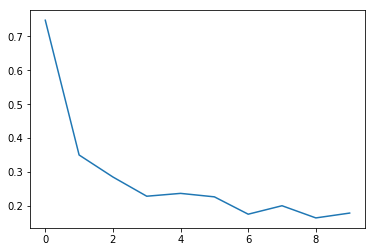

In [0]:

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

KeyError: ignored

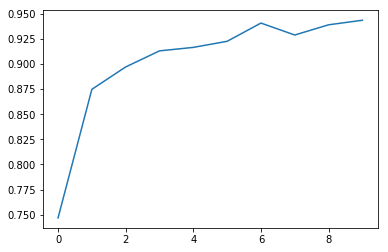

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [0]:
import pandas as pd

In [0]:
test=pd.read_csv("test.csv")
test.shape

(2680, 1)

In [0]:
pixels=pd.read_csv("output128_3.csv")

In [0]:
from keras.models import load_model
new=load_model("model.h5")


In [0]:
test_data=pd.merge(test, pixels, on='image')


In [0]:
test_data.shape

(2680, 49153)

In [0]:
test_data.columns

Index(['image', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f49143', 'f49144', 'f49145', 'f49146', 'f49147', 'f49148', 'f49149',
       'f49150', 'f49151', 'f49152'],
      dtype='object', length=49153)

In [0]:
x_test=test_data.drop(labels = ["image"],axis = 1)

In [0]:
x_test1=x_test/51

In [0]:
x_test1.shape

(2680, 49152)

In [0]:
x_test1=x_test1.values.reshape(-1,128,128,3)

In [0]:
ypred_test=new.predict(x_test1)

In [0]:
ypred_test.shape

(2680, 5)

In [0]:
import numpy as np
prediction=np.argmax(ypred_test,axis=1)
      
    

In [0]:
prediction.shape

(2680,)

In [0]:
pred_list=prediction.tolist()

In [0]:
pred_list1=[]
for i in pred_list:
  pred_list1.append(i+1)

In [0]:
from csv import DictReader
with open('test.csv') as f:
    image1=[row['image'] for row in DictReader(f)]

df=pd.DataFrame(data={"image":image1,"category":pred_list1})
df.to_csv("submit1_1283.csv",sep=',',index=False)
